# <center> Predicting Stars, Galaxies & Quasars with ML Model

---

**Project Name: Predicting Stars, Galaxies & Quasars with ML Model**

---

<center> <img src = "https://chandra.harvard.edu/photo/2019/gsn069/gsn069_525.gif" width = 55%>

## Workflow of this notebook
**1)** [Introducing Dataset](#h1)      
**2)** [Importing necessary libraries and modules for this notebook](#h2)    
**3)** [Exploring the Dataset](#h3)      
**4)** [Preparing data for our model](#h4)           
**5)** [Scaling the data for our model and checking the distribution plots](#h5)   
**6)** [Building the ML models and checking results](#h6)        


# About the Problem & Our Dataset - <a name ="h1"></a>

### So what exactly are stars, galaxies, and quasars?

*     <p align="justify">A GALAXY is a gravitationally bound system of stars, stellar remnants, interstellar gas, dust, and dark matter. Galaxies are categorised according to their visual morphology as elliptical, spiral, or irregular. Many galaxies are thought to have supermassive black holes at their active centers.</p>

<br> <center> <img src = "https://drive.google.com/uc?id=16taukAE02GkdbR2u1nLVKdVkVB_h7Jc1" width = 50%> <br>

*     <p align="justify">A STAR is a type of astronomical object consisting of a luminous spheroid of plasma held together by its own gravity. The nearest star to Earth is the Sun.

<br> <center> <img src = "https://drive.google.com/uc?id=1mJGJ6MXuc2LUIP_cbzQBjHAH84a_XJPD" width = 50%>


*     <p align="justify">A QUASAR, also known as a quasi-stellar object, is an extremely luminous active galactic nucleus (AGN). The power radiated by quasars is enormous. A typical quasar is 27 trillion times brighter than our sun! If you were to place a quasar at the distance of Pluto, it would vaporise all of Earth’s oceans to steam in a fifth of a second.

<br>  <center> <img src = "https://drive.google.com/uc?id=1leFEIYqPxz_expXFg_2v8bgkFQipk5F-" width = 50%>

The dataset we'll be using for this model is the [Sloan Digital Sky Survey DR14](https://www.kaggle.com/datasets/lucidlenn/sloan-digital-sky-survey)

<p align="justify">The data consists of 10,000 observations of space taken by the SDSS. Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar. 30% of it is used in testing the model performance and 70% in training of the model.

# Importing necessary libraries and modules for the dataset <a name = 'h2'></a>

### First of all we need to import all the packages we need. Numpy and Pandas for data manipulation and all the modules from sklearn for the machine learning feature


In [ ]:
#Importing Necessary Libraries

'''Operating System Functionality'''
import os

'''Data Handling & Linear Algebra'''
import numpy as np
import pandas as pd

'''Visualisation'''
import matplotlib.pyplot as plt
import seaborn as sns

'''Manipulating Data and Model Building'''
import tensorflow as tf
from tensorflow import keras

'''Data Analysis'''
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

'''Measuring Classification Performance'''
from sklearn.metrics import accuracy_score

'''Classification & Regression'''
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

'''Ignore warnings'''
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [ ]:
#Importing the dataset
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Exploratory Analysis<a name ='h3'></a>

In [ ]:
#Loading data into a dataframe
data = pd.read_csv("/content/Skyserver_SQL2_27_2018 6_51_39 PM.csv")

In [ ]:
#Displaying the first 5 rows of the dataset
data.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [ ]:
#Displaying the dimensions of the dataset
data.shape

(10000, 18)

#### The object id columns are of little use in the analysis hence we can delete them from the dataset.

In [ ]:
#Drop the object id columns, they are of no use in the analysis
data.drop(['objid','specobjid'], axis=1, inplace=True)

In [ ]:
#Data after dropping columns
data.head(10)

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,STAR,-0.000009,3306,54922,491
1,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,STAR,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,GALAXY,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,STAR,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,STAR,0.000590,3306,54922,512
5,183.847174,0.173694,19.43133,18.46779,18.16451,18.01475,18.04155,752,301,4,269,STAR,0.000315,324,51666,594
6,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,752,301,4,269,GALAXY,0.100242,287,52023,559
7,183.900081,0.187473,18.97993,17.84496,17.38022,17.20673,17.07071,752,301,4,269,STAR,0.000315,3306,54922,515
8,183.924588,0.097246,17.90616,16.97172,16.67541,16.53776,16.47596,752,301,4,270,STAR,0.000089,323,51615,595
9,183.973498,0.081626,18.67249,17.71375,17.49362,17.28284,17.22644,752,301,4,270,GALAXY,0.040508,288,52000,400


In [ ]:
data.shape

(10000, 16)

In [ ]:
data.describe()

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,redshift,plate,mjd,fiberid
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,0.143726,1460.986400,52943.533300,353.069400
std,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,0.388774,1788.778371,1511.150651,206.298149
min,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,-0.004136,266.000000,51578.000000,1.000000
25%,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,0.000081,301.000000,51900.000000,186.750000
50%,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,0.042591,441.000000,51997.000000,351.000000
75%,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,0.092579,2559.000000,54468.000000,510.000000
max,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,5.353854,8410.000000,57481.000000,1000.000000


In [ ]:
#Checking for null values to determine completeness of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ra        10000 non-null  float64
 1   dec       10000 non-null  float64
 2   u         10000 non-null  float64
 3   g         10000 non-null  float64
 4   r         10000 non-null  float64
 5   i         10000 non-null  float64
 6   z         10000 non-null  float64
 7   run       10000 non-null  int64  
 8   rerun     10000 non-null  int64  
 9   camcol    10000 non-null  int64  
 10  field     10000 non-null  int64  
 11  class     10000 non-null  object 
 12  redshift  10000 non-null  float64
 13  plate     10000 non-null  int64  
 14  mjd       10000 non-null  int64  
 15  fiberid   10000 non-null  int64  
dtypes: float64(8), int64(7), object(1)
memory usage: 1.2+ MB


No missing data so the dataset is complete with no voids and missing cells

### The Target from data is Data classification to Star Galaxy or Quasar, so the class column has 3 Categories and in this case we need to convert them into numeric data.

Sklearn provides a very efficient tool for encoding the levels of categorical features into numeric values. ``` LabelEncoder().fit ``` encodes labels with a value between 0 and n_classes-1 where n is the number of distinct labels. If a label repeats it assigns the same value to as assigned earlier. You can read more about it [here](https://stackoverflow.com/questions/66056695/what-does-labelencoder-fit-do)!




In [ ]:
le = LabelEncoder().fit(data['class'])
data['class'] = le.transform(data['class'])

# The Final Dataset <a name = 'h4'></a>

In [ ]:
#Printing the dataset after all the changes to check the dataset
data.head(10)

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,2,-0.000009,3306,54922,491
1,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,2,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,0,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,2,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,2,0.000590,3306,54922,512
5,183.847174,0.173694,19.43133,18.46779,18.16451,18.01475,18.04155,752,301,4,269,2,0.000315,324,51666,594
6,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,752,301,4,269,0,0.100242,287,52023,559
7,183.900081,0.187473,18.97993,17.84496,17.38022,17.20673,17.07071,752,301,4,269,2,0.000315,3306,54922,515
8,183.924588,0.097246,17.90616,16.97172,16.67541,16.53776,16.47596,752,301,4,270,2,0.000089,323,51615,595
9,183.973498,0.081626,18.67249,17.71375,17.49362,17.28284,17.22644,752,301,4,270,0,0.040508,288,52000,400


After lable encoding, Galaxies have been replaced by number 0, Quasars by number 1 and Stars by number 2

In [ ]:
#Checking the information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ra        10000 non-null  float64
 1   dec       10000 non-null  float64
 2   u         10000 non-null  float64
 3   g         10000 non-null  float64
 4   r         10000 non-null  float64
 5   i         10000 non-null  float64
 6   z         10000 non-null  float64
 7   run       10000 non-null  int64  
 8   rerun     10000 non-null  int64  
 9   camcol    10000 non-null  int64  
 10  field     10000 non-null  int64  
 11  class     10000 non-null  int64  
 12  redshift  10000 non-null  float64
 13  plate     10000 non-null  int64  
 14  mjd       10000 non-null  int64  
 15  fiberid   10000 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 1.2 MB


We can understand that the dataset is complete with no null values. And since the dataset has only numerical values now, there's no need of further encoding and type conversions.

Perform train and test split

In [ ]:
X = data.drop('class', axis=1)
y = data['class']

# Data Scaling <a name = 'h5'></a>

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=True , with_mean= True , with_std = True)
X= scaler.fit_transform(X)

In [ ]:
#Show data
X[:20]

array([[ 0.16745842, -0.58492272,  1.03148637, -0.34855938, -0.83728027,
        -0.94605772, -0.99534154, -0.83806089,  0.        ,  0.21085172,
        -0.21763043, -0.36973112,  1.03148936,  1.30931064,  0.66863177],
       [ 0.16886159, -0.58311429,  0.05243046, -0.16653251, -0.15415531,
        -0.08264457, -0.02604308, -0.83806089,  0.        ,  0.21085172,
        -0.21763043, -0.36984929, -0.63621258, -0.87919741,  0.91101156],
       [ 0.17057433, -0.58347525,  0.92156796,  0.86709322,  0.59315368,
         0.44120145,  0.31452753, -0.83806089,  0.        ,  0.21085172,
        -0.21147922, -0.05302706, -0.65633905, -0.60919097,  0.77527888],
       [ 0.17455754, -0.58650069, -1.03063038, -0.81362749, -0.63669227,
        -0.52660429, -0.43092107, -0.83806089,  0.        ,  0.21085172,
        -0.20532801, -0.36999261,  1.03148936,  1.30931064,  0.76073609],
       [ 0.17482457, -0.58441247, -1.29023238, -1.17251944, -0.37676237,
        -0.02510121,  0.15827647, -0.83806089, 

In [ ]:
#Performing the 30% test and 70% train split here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=128)

In [ ]:
X_train

# Density Distribution Plots

<Axes: xlabel='class', ylabel='count'>

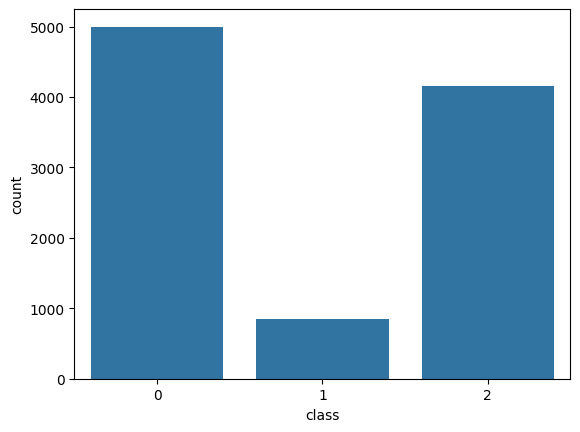

In [ ]:
#Checking the number of labels for each class of the dataset where 0 = Galaxy, 1 = Quasar, 2 = Star.
sns.countplot(x=data['class'])

### Some information about the filters used while gathering the data:
"U" stands for ultraviolet.
"G" stands for green.
"R" stands for red.
"I" stands for infrared.

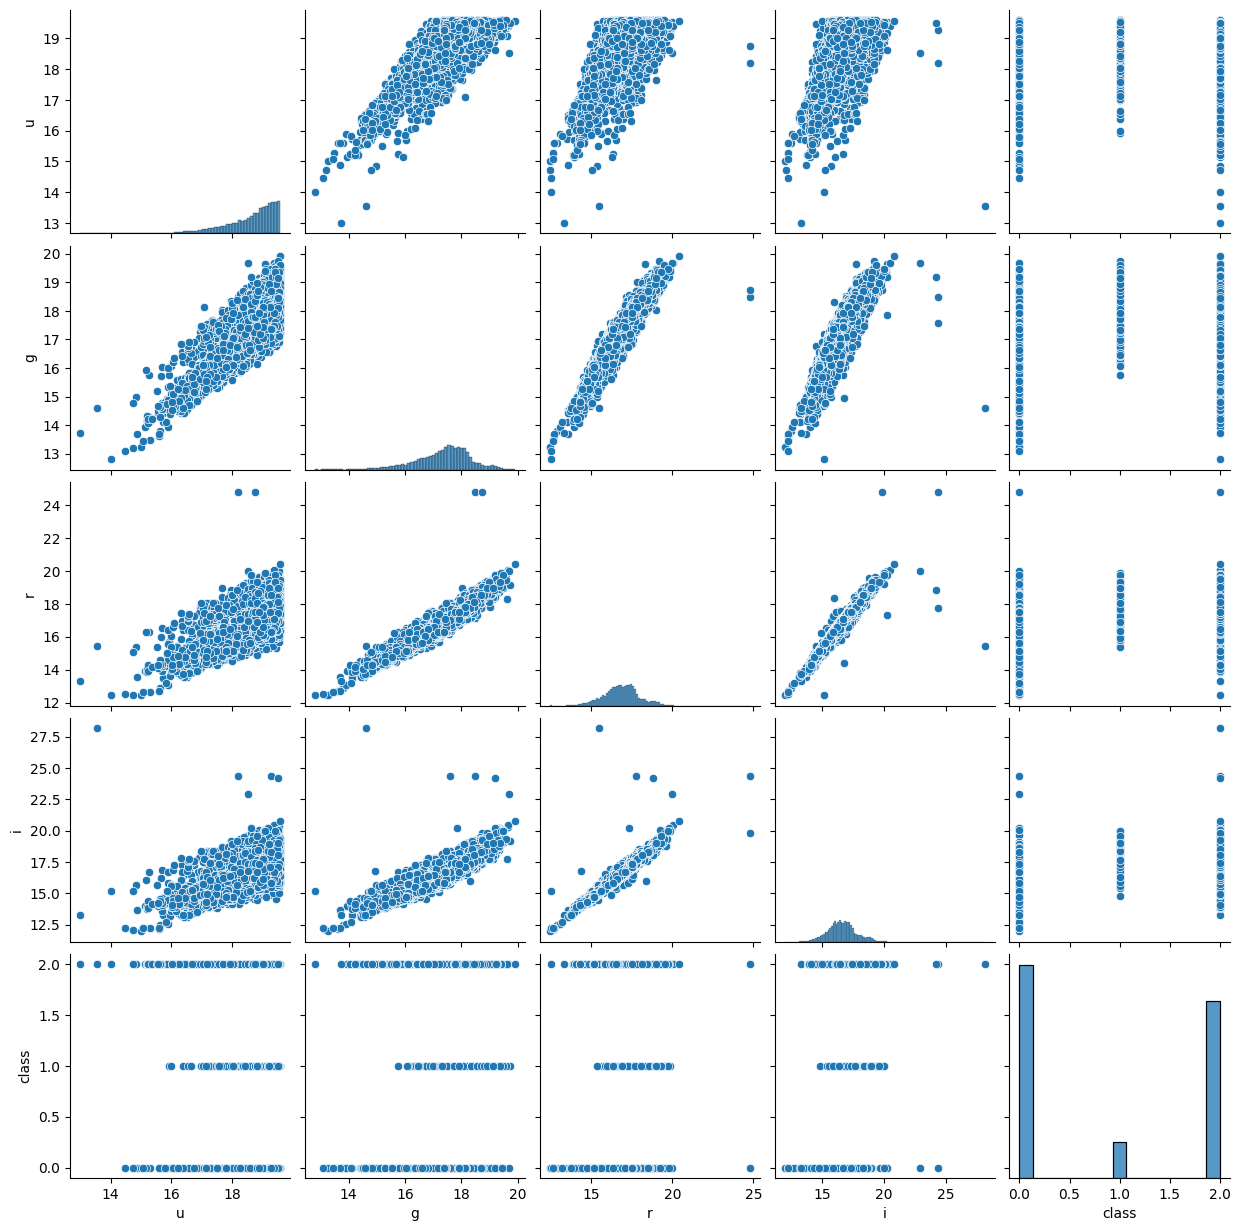

In [ ]:
#Using pairplots to establish and understand interdependancy of train features
sns.pairplot(data[['u','g','r','i','class']])

## Machine Learning models (Classification models) <a name = 'h6'></a>

### Decision tree classifier -

In [ ]:
# Decision Tree Classifier
dtClassifer = DecisionTreeClassifier(max_leaf_nodes=15,max_depth=3)

### Linear regression classifier -

In [ ]:
#Linear Classifier - Logistic Regression
LRClassifer = LogisticRegression()

### KNN classifier -



In [ ]:
#Nearest Neighbor Classifier
NeNeClassifier = KNeighborsClassifier(n_neighbors=3)

In [ ]:
#Fitting the models to the dataset
dtClassifer.fit(X_train, y_train)

LRClassifer.fit(X_train, y_train)

NeNeClassifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
#Getting the prediction set of the models
y_preds = dtClassifer.predict(X_test)
y_predsLR = LRClassifer.predict(X_test)
y_predsNeNe = NeNeClassifier.predict(X_test)

In [ ]:
#Displaying the last 10 predictions on the test split as output by all the models

print(y_preds[:10],'\n',y_test[:10])

print("\n*******************************************************")
print(y_predsLR[:10],'\n',y_test[:10])

print("\n*******************************************************")
print(y_predsNeNe[:10],'\n',y_test[:10])

[2 0 2 2 0 0 2 1 0 0] 
 7054    2
4692    0
907     2
4498    2
9957    0
3341    0
7152    2
1152    1
7105    0
2066    0
Name: class, dtype: int64

*******************************************************
[2 0 2 2 0 0 2 1 0 0] 
 7054    2
4692    0
907     2
4498    2
9957    0
3341    0
7152    2
1152    1
7105    0
2066    0
Name: class, dtype: int64

*******************************************************
[2 0 2 2 0 0 2 1 0 0] 
 7054    2
4692    0
907     2
4498    2
9957    0
3341    0
7152    2
1152    1
7105    0
2066    0
Name: class, dtype: int64


### Classification Report

In [ ]:
from sklearn.metrics import classification_report
target_names = ['0', '1', '2']

print('\033[1m  Decision Tree -\n  \033[0m',classification_report(y_preds,y_test,target_names=target_names) + '\n')
print('\033[1m  Linear Regression -\n  \033[0m',classification_report(y_predsLR,y_test,target_names=target_names) + '\n')
print("\033[1m  KNN Classifier -\n  \033[0m",classification_report(y_predsNeNe,y_test,target_names=target_names) + '\n')

  Decision Tree -
                 precision    recall  f1-score   support

           0       0.99      0.99      0.99      1504
           1       0.94      0.98      0.96       255
           2       1.00      1.00      1.00      1241

    accuracy                           0.99      3000
   macro avg       0.98      0.99      0.98      3000
weighted avg       0.99      0.99      0.99      3000


  Linear Regression -
                 precision    recall  f1-score   support

           0       0.97      0.99      0.98      1469
           1       0.94      0.97      0.96       258
           2       0.99      0.96      0.98      1273

    accuracy                           0.98      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.98      0.98      0.98      3000


  KNN Classifier -
                 precision    recall  f1-score   support

           0       0.94      0.89      0.91      1575
           1       0.88      0.97      0.92       240
     

In [ ]:
from google.colab import files
import pickle
# Save the model to a file
with open('dtClassifer.pkl', 'wb') as f:
 pickle.dump(dtClassifer, f)
# Download the saved model file
files.download('dtClassifer.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
feature_names = list(data.columns)

In [ ]:
# Assuming you have trained a DecisionTreeClassifier named 'dt_classifier'
root_node = dtClassifer.tree_.feature[0]
print(root_node)


11


In [ ]:
# Assuming you have feature names stored in a list called 'feature_names'
root_feature_name = feature_names[11]
print("Root feature name:", root_feature_name)


Root feature name: class


In [ ]:
def traverse_tree(node_index, tree):
    left_child = tree.children_left[node_index]
    right_child = tree.children_right[node_index]
    feature_index = tree.feature[node_index]
    threshold = tree.threshold[node_index]

    print("Node Index:", node_index)
    print("Feature Index:", feature_index)
    print("Threshold:", threshold)
    print("Left Child:", left_child)
    print("Right Child:", right_child)
    print("-----------------------------")

    if left_child != right_child:  # If node is not a leaf
        # Traverse left child
        traverse_tree(left_child, tree)
        # Traverse right child
        traverse_tree(right_child, tree)

# Assuming you have trained a DecisionTreeClassifier named 'dt_classifier'
traverse_tree(0, dtClassifer.tree_)


Node Index: 0
Feature Index: 11
Threshold: -0.3657665252685547
Left Child: 1
Right Child: 2
-----------------------------
Node Index: 1
Feature Index: 2
Threshold: 1.1537627577781677
Left Child: 9
Right Child: 10
-----------------------------
Node Index: 9
Feature Index: 4
Threshold: -2.372812867164612
Left Child: 13
Right Child: 14
-----------------------------
Node Index: 13
Feature Index: -2
Threshold: -2.0
Left Child: -1
Right Child: -1
-----------------------------
Node Index: 14
Feature Index: -2
Threshold: -2.0
Left Child: -1
Right Child: -1
-----------------------------
Node Index: 10
Feature Index: 2
Threshold: 1.1545230746269226
Left Child: 11
Right Child: 12
-----------------------------
Node Index: 11
Feature Index: -2
Threshold: -2.0
Left Child: -1
Right Child: -1
-----------------------------
Node Index: 12
Feature Index: -2
Threshold: -2.0
Left Child: -1
Right Child: -1
-----------------------------
Node Index: 2
Feature Index: 11
Threshold: 0.19041405618190765
Left Chil

In [ ]:
root_feature_name = feature_names[1]
print("Root feature name 1:", root_feature_name)

root_feature_name = feature_names[12]
print("Root feature name 2:", root_feature_name)

Root feature name 1: dec
Root feature name 2: redshift


In [ ]:
root_feature_name = feature_names[0]
print("Root feature name 1:", root_feature_name)
root_feature_name = feature_names[1]
print("Root feature name 1:", root_feature_name)
root_feature_name = feature_names[2]
print("Root feature name 1:", root_feature_name)
root_feature_name = feature_names[3]
print("Root feature name 1:", root_feature_name)
root_feature_name = feature_names[4]
print("Root feature name 1:", root_feature_name)
root_feature_name = feature_names[5]
print("Root feature name 1:", root_feature_name)
root_feature_name = feature_names[6]
print("Root feature name 1:", root_feature_name)
root_feature_name = feature_names[7]
print("Root feature name 1:", root_feature_name)
root_feature_name = feature_names[8]
print("Root feature name 1:", root_feature_name)
root_feature_name = feature_names[9]
print("Root feature name 1:", root_feature_name)
root_feature_name = feature_names[10]
print("Root feature name 1:", root_feature_name)
root_feature_name = feature_names[11]
print("Root feature name 1:", root_feature_name)
root_feature_name = feature_names[12]
print("Root feature name 1:", root_feature_name)
root_feature_name = feature_names[13]
print("Root feature name 1:", root_feature_name)
root_feature_name = feature_names[14]
print("Root feature name 1:", root_feature_name)
root_feature_name = feature_names[15]
print("Root feature name 1:", root_feature_name)
root_feature_name = feature_names[16]
print("Root feature name 1:", root_feature_name)
root_feature_name = feature_names[17]
print("Root feature name 1:", root_feature_name)